# EAS 4610 - Earth Systems Modeling - Final Project
## Atmospheric/Shallow Water Gravity Waves
### By: Carson Clements, Kate Breeden
### Due: Tuesday, December 6th
### Requirements/Rubric: https://gatech.instructure.com/courses/261984/assignments/1234642
### Original Paper (Internal Gravity Waves in the Atmosphere): https://reader.elsevier.com/reader/sd/pii/S007461420480041X?token=0857787B8B9E9271C8A60B92489BEFF2C13E45CB9E82B096A270BAF36C9140939E1555793F0E0CF14F4AF85AECACF9A9&originRegion=us-east-1&originCreation=20221129172936

List of Requirements
## Introduction

## Equations

## Numerical Methods

## Results

## Figures

## WaveEqnDemo Base
### Created by: Dr. Robel
### Minor Edits by: Carson Clements, Kate Breeden

### Necessary Imports

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

### Parameters to Consider

In [47]:
alpha1 = 1
alpha2 = 2
L = 30.0
xt = 15
tf = 100.0

### Assembling the Grid

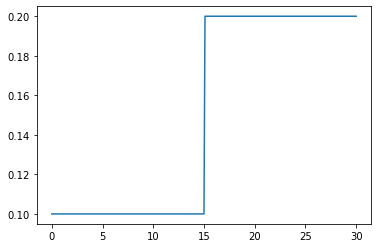

In [48]:
nx = 301
nt = 10000

x = np.linspace(0,L,nx) # Need L to evenly divide into nx
t = np.linspace(0,tf,nt) # Need tf to evenly divide into nt

dt = t[1]-t[0]
dx = x[1]-x[0]

lam = np.zeros(nx)
lam[x<=xt] = alpha1*dt/dx
lam[x>xt] = alpha2*dt/dx

plt.plot(x,lam)

### Pre-Allocating Variables and Initial Conditions

In [49]:
u = np.nan*np.ones([nx,nt])
u[:,0] = np.exp(-(x**2) / 2)
u[:,1] = np.exp(-(x**2) / 2)

### Making the Tridiagonal Matrix

In [50]:
data = np.array([(lam**2)*np.ones(nx), 2*(1-lam**2)*np.ones(nx), (lam**2)*np.ones(nx)])
diags = np.array([-1, 0, 1])
M = spdiags(data, diags, nx, nx).toarray()

### Establishing Boundary Conditions

In [51]:
#Reflective BC
M[0,0] = 2-lam[0]**2
M[-1,-1] = 2-lam[-1]**2

### Solving the Equation

In [52]:
for k in np.arange(nt-2):
    u[:,k+2] = np.matmul(M,u[:,k+1]) - u[:,k]

### Plotting the Solution

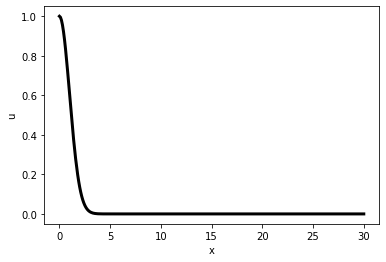

In [53]:
for k in range(1, 10, nt):
    plt.plot(x,u[:,k], 'k', linewidth=3)
    plt.xlabel('x')
    plt.ylabel('u')
    #set(gca,fontsize=20)

# Creating the Wave Function

### Parameters for Shallow Water/Atmospheric Gravity Waves

In [ ]:
#alpha = u + or - sqrt(gravity * Height or Mean Depth of Lower Layer)
# Have to modify above equation to fit two alpha values'
# Assume perturbation values can be neglected because H >> h'
# h' = A*e^(ik[x-(u+sqrt(gH))t]) What is A? i & k are time and place step, respectively
